# Segmentando a relevância dos reviews da Yelp
---
Nesse projeto vamos aplicar um algoritmo para segmentar os diferentes reviews. Essa segmentação será baseada nas avaliações desses reviews (cool. funny, useful). Assim, conseguimos verificar quais são os reviews relevantes entre todos.

Após a aplicação do algoritmo, vamos visualizar os resultados com Seaborn

Começamos importando as bibliotecas necessárias

In [91]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Após isso, lemos nosso arquivo

In [92]:
df = pd.read_csv('yelp.csv')

E então selecionamos as colunas que serão utilizadas

In [93]:
df = df[['cool','useful','funny']]

In [94]:
X = df.dropna()

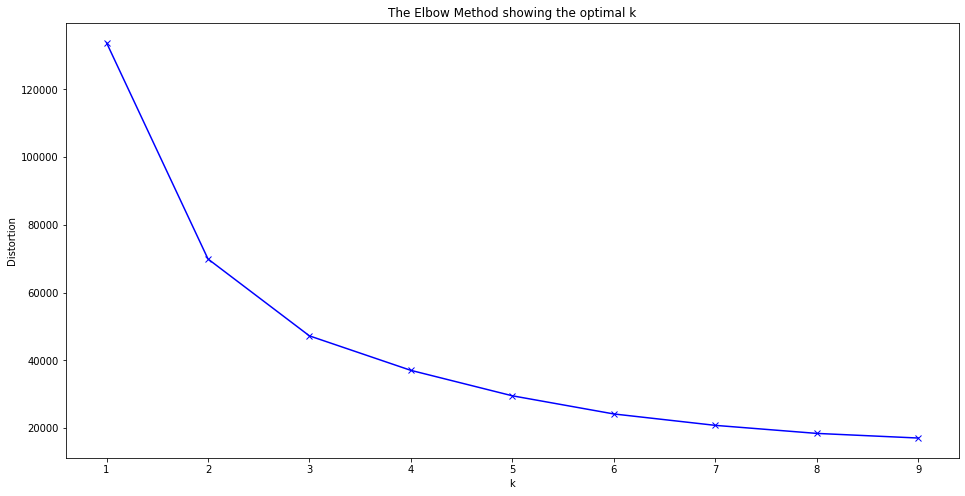

In [95]:
distortions = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [96]:
modelo = KMeans(n_clusters = 3)
modelo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Escrever uma função para renomear os clusters

In [104]:
def func(x):
  if x == 0:
    return 'baixa'
  if x == 2:
    return 'media'
  else:
    return 'alta'

In [105]:
predict = modelo.predict(X)
df['relevancia'] = predict
df['relevancia'] = df['relevancia'].apply(lambda x: func(x))

Agora que já obtivemos nossos clusters, vamos visualizá-los em gráficos de dispersão

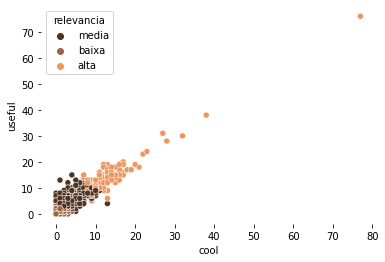

In [109]:
sns.scatterplot(x='cool', y='useful', hue='relevancia',data=df, palette='copper')
plt.box(False)

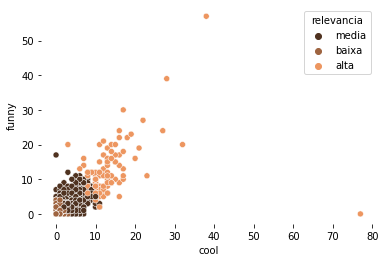

In [110]:
sns.scatterplot(x='cool', y='funny', hue='relevancia',data=df, palette='copper')
plt.box(False)

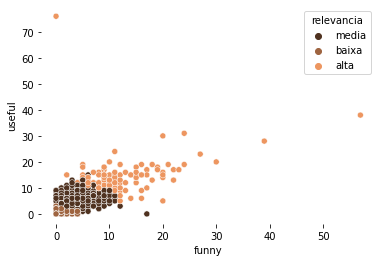

In [111]:
sns.scatterplot(x='funny', y='useful', hue='relevancia',data=df, palette='copper')
plt.box(False)

O algoritmo conseguiu segmentar os comentários por sua relevância. A partir dos resultados gerados, podemos criar maneiras de mostrar esses comentários primeiro, ou criar até um sistema de recomendação de comentários. Mas fica para um projeto futuro!